In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import imageio
#!pip install folium
import folium
from folium.plugins import MarkerCluster
from ipywidgets import interactive
import os
import json
#!pip install interactive


In [2]:
%matplotlib inline

In [28]:
crime = pd.read_csv('https://raw.githubusercontent.com/jsiwu94/BostonCrimeProject/master/crimes-in-boston/crimetodate_cleaneddata.csv', encoding = 'latin')
#crime.head()
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399636 entries, 0 to 399635
Data columns (total 20 columns):
Unnamed: 0             399636 non-null int64
INCIDENT_NUMBER        399636 non-null object
OFFENSE_CODE           399636 non-null int64
OFFENSE_CODE_GROUP     399636 non-null object
OFFENSE_DESCRIPTION    399636 non-null object
DISTRICT               397816 non-null object
REPORTING_AREA         399636 non-null object
SHOOTING               399636 non-null int64
YEAR                   399636 non-null int64
MONTH                  399636 non-null int64
DAY_OF_WEEK            399636 non-null object
HOUR                   399636 non-null int64
UCR_PART               399527 non-null object
STREET                 397111 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location_lat           399636 non-null float64
Location_long          399636 non-null float64
date_occured           399636 non-null object
occured_on_dttm  

In [30]:
crime.shape

(399636, 20)

In [32]:
sum(crime.duplicated())

0

In [33]:
crime.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location_lat,Location_long,date_occured,occured_on_dttm
0,1,I192082859,724,Auto Theft,AUTO THEFT,E18,519,0,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,42.259518,-71.121563,2019-10-13,2019-10-13 09:28:24
1,2,I192082751,724,Auto Theft,AUTO THEFT,E18,493,0,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,42.262092,-71.116710,2019-10-12,2019-10-12 20:11:26
2,3,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,0,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,42.352375,-71.135096,2019-10-12,2019-10-12 15:12:43
3,4,I192082577,724,Auto Theft,AUTO THEFT,D4,130,0,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,42.349476,-71.076402,2019-10-12,2019-10-12 04:41:52
4,5,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,0,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,42.381846,-71.066551,2019-10-02,2019-10-02 08:08:49


min data date : 2015-06-15 00:00:00
max data date : 2019-10-13 09:28:24
Incomplete year data on 2015 & 2019


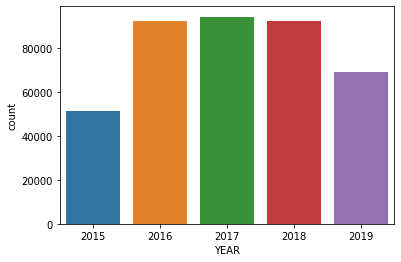

In [34]:
sns.countplot("YEAR", data = crime)
print("min data date :", min(crime.occured_on_dttm))
print("max data date :", max(crime.occured_on_dttm))
print("Incomplete year data on 2015 & 2019")

In [46]:
#plotting Crime Distribution by Day of Week and Comparing the years
sns.set_palette("pastel")
def month(x):
    return sns.countplot("MONTH", data = crime[crime.YEAR == x])
interactive(month,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [37]:
#plotting Crime Distribution by Day of Week and Comparing the years
def week(x):
    return sns.countplot("DAY_OF_WEEK",order=crime.DAY_OF_WEEK.value_counts().index, data = crime[crime.YEAR == x])
interactive(week,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

In [38]:
#plotting Crime Distribution by hour
#result = starts from 7AM & Peaks in the Afternoon (4pm to 7pm) -- 
#this is true across all 4 years
def hour(x):
    return sns.countplot("HOUR", data = crime[crime.YEAR == x])
interactive(hour,x=(2015,2019,1))

interactive(children=(IntSlider(value=2017, description='x', max=2019, min=2015), Output()), _dom_classes=('wi…

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

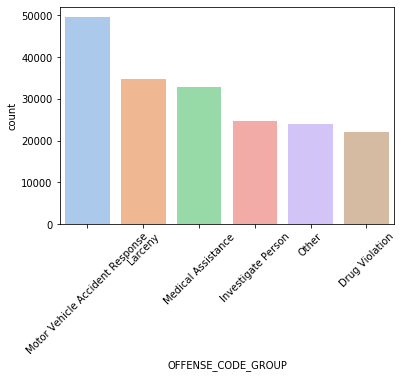

In [0]:
##Top Six Offense Group During All Day
order = crime['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = crime, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

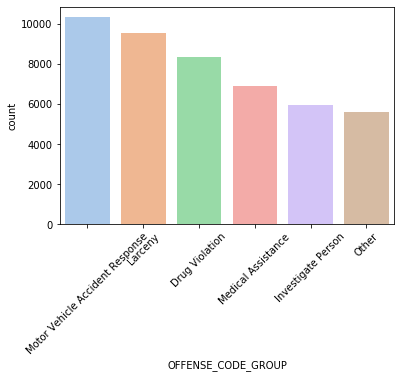

In [42]:
##Top Six Offense Group During Peak Time (4pm to 7 pm, 11pm to 12am)
hr = crime[(crime.HOUR >= 16) & (crime.HOUR <=19) | (crime.HOUR >= 23) &(crime.HOUR <=0)]
order = hr['OFFENSE_CODE_GROUP'].value_counts().head(6).index
sns.countplot(data = hr, x='OFFENSE_CODE_GROUP', order = order)
plt.xticks(rotation=45)

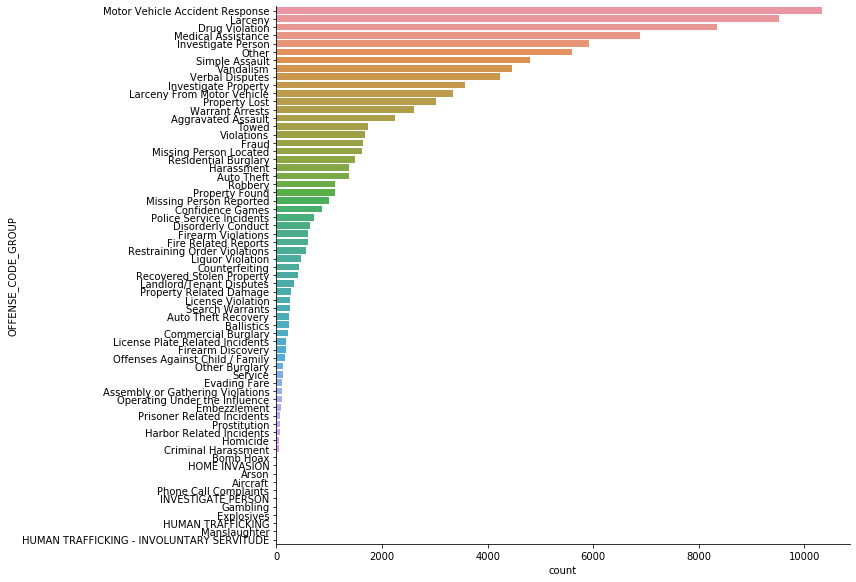

In [40]:
##All Offense Group During Peak Time (4pm to 7 pm, 11pm to 12am)
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.OFFENSE_CODE_GROUP.value_counts().index,
           data=hr)

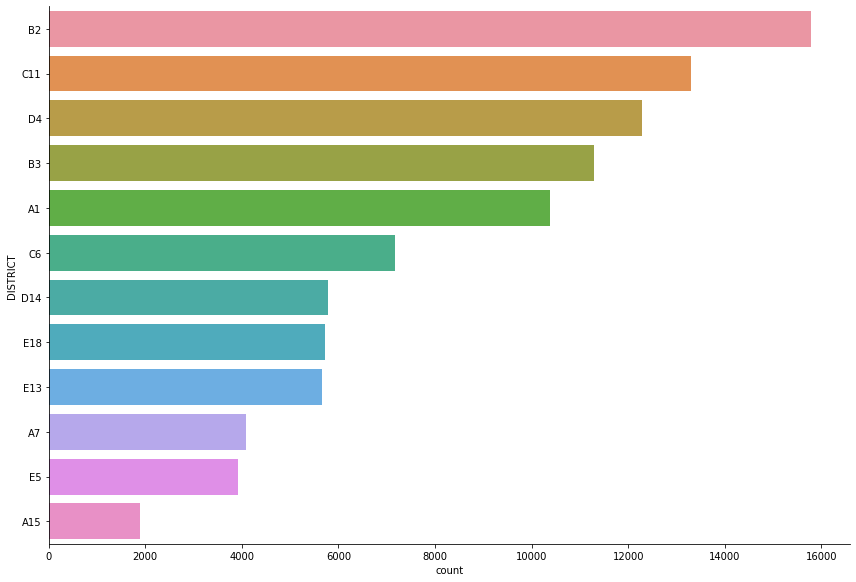

In [47]:
##Crime Count on DISTRICT During Peak Time (4pm to 7 pm, 11pm to 12am)
sns.catplot(y='DISTRICT',
           kind='count',
            height=8, 
            aspect=1.5,
            order=hr.DISTRICT.value_counts().index,
           data=hr)

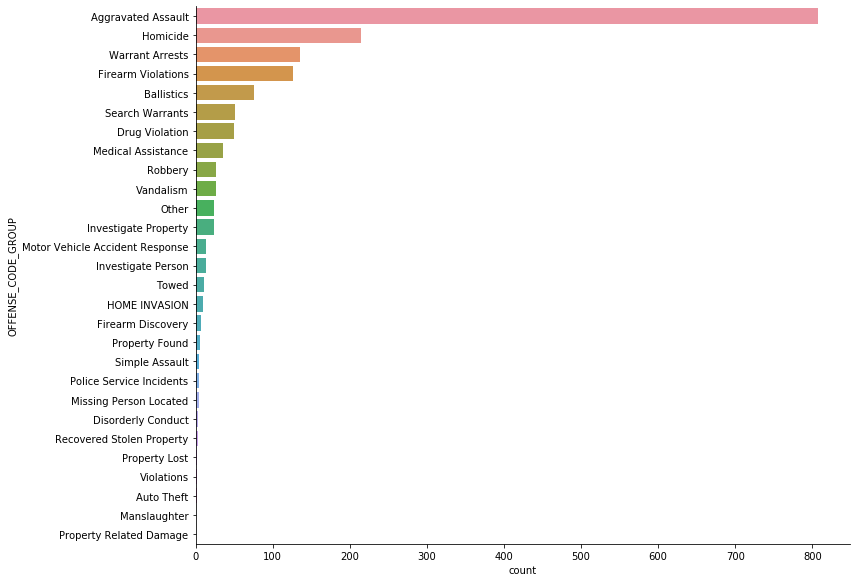

In [48]:
#Type of offense code where there is shootings
shtgs = crime[crime.SHOOTING == 1]
sns.catplot(y='OFFENSE_CODE_GROUP',
           kind='count',
            height=8, 
            aspect=1.5,
            order=shtgs.OFFENSE_CODE_GROUP.value_counts().index,
           data=shtgs)

In [70]:
#Finding areas where there is more than 7 crime incidents
tmp = crime.groupby('INCIDENT_NUMBER')['YEAR'].count().sort_values(ascending = False)
tmp = pd.DataFrame({'INCIDENT_NUMBER': tmp.index, 'NUM_RECORDS': tmp.values})
seriousCrimes = crime.merge(tmp[tmp['NUM_RECORDS'] > 7], on = 'INCIDENT_NUMBER', how = 'inner')
seriousCrimes.info()
#seriousCrimes.to_csv('C:/Users/shuji/Desktop/Python project/BostonCrimeProject/crimes-in-boston/crimes_over_7_details.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 587
Data columns (total 21 columns):
Unnamed: 0             588 non-null int64
INCIDENT_NUMBER        588 non-null object
OFFENSE_CODE           588 non-null int64
OFFENSE_CODE_GROUP     588 non-null object
OFFENSE_DESCRIPTION    588 non-null object
DISTRICT               588 non-null object
REPORTING_AREA         588 non-null object
SHOOTING               588 non-null int64
YEAR                   588 non-null int64
MONTH                  588 non-null int64
DAY_OF_WEEK            588 non-null object
HOUR                   588 non-null int64
UCR_PART               579 non-null object
STREET                 572 non-null object
Lat                    588 non-null float64
Long                   588 non-null float64
Location_lat           588 non-null float64
Location_long          588 non-null float64
date_occured           588 non-null object
occured_on_dttm        588 non-null object
NUM_RECORDS            588 non-null i

In [71]:
tmp = crime.groupby('INCIDENT_NUMBER')['YEAR'].count().sort_values(ascending = False)
tmp = pd.DataFrame({'INCIDENT_NUMBER': tmp.index, 'NUM_RECORDS': tmp.values})
seriousCrimes1 = crime.merge(tmp[tmp['NUM_RECORDS'] > 7], on = 'INCIDENT_NUMBER', how = 'inner')
seriousCrimes1 = seriousCrimes1[['INCIDENT_NUMBER', 'Lat','Long']].drop_duplicates()[['Lat','Long']].dropna()
seriousCrimes1.info()
#seriousCrimes1.to_csv('C:/Users/shuji/Desktop/Python project/BostonCrimeProject/crimes-in-boston/crimes_over_7_unique.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 577
Data columns (total 2 columns):
Lat     59 non-null float64
Long    59 non-null float64
dtypes: float64(2)
memory usage: 1.4 KB


In [75]:
# Used this tutorial: https://medium.com/@bobhaffner/folium-markerclusters-and-fastmarkerclusters-1e03b01cb7b1
## This Map Visualization consists of detals such as crime code& street name for every location where crime count is over 7.
boston = folium.Map(location = [seriousCrimes['Lat'].mean(), 
                                  seriousCrimes['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in seriousCrimes.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = 'Offense Code:'+str(row.OFFENSE_CODE_GROUP)+'.\n'+'Street:'+
                               str(row.STREET)))

boston.add_child(mc)

boston

In [76]:
###shooting data
## This map is shooting location for every crime in Boston from 2015-06-15 to 2019-10-13.
shtng = crime[(crime.SHOOTING == 1)]

boston1 = folium.Map(location = [shtng['Lat'].mean(), 
                                  shtng['Long'].mean()], 
                      zoom_start = 12)
mc = MarkerCluster()
#creating a Marker for each point. 
for row in shtng.itertuples():
    mc.add_child(folium.Marker(location = [row.Lat,row.Long],tooltip = row.OFFENSE_CODE_GROUP))

boston1.add_child(mc)

boston1

# http://geojson.io/#map=2/20.0/0.0